# ABC Call Volume by Sagir Mehmood

## Project Description:

- This is a dataset of a Customer Experience (CX) Inbound calling team for 23 days of ABC Insurance company. Data includes Agent_Name, Agent_ID, Queue_Time [duration for which customer have to wait before they get connected to an agent], Time [time at which call was made by customer in a day], Time_Bucket [for easiness we have also provided you with the time bucket], Duration [duration for which a customer and executives are on call], call status (Abandon, answered, transferred).

- A customer experience (CX) team is made up of experts who examine data and consumer input before sharing their findings with the rest of the company. The roles and responsibilities that these teams typically carry out include: Customer experience programmes (CX programmes), Digital customer experience, Design and processes, Internal communications, Voice of the customer (VoC), User experiences, Customer experience management, Journey mapping, Nurturing customer interactions, Customer success, Customer support, Handling Customer Data, and Learning about the Customer Journey.

## Objectives :

- ##### A. Calculate the average call time duration for all incoming calls received by agents (in each Time_Bucket).

- ##### B. Show the total volume/ number of calls coming in via charts/ graphs [Number of calls v/s Time]. You can select time in a bucket form (i.e. 1-2, 2-3, …..)
  
- ##### C. As you can see current abandon rate is approximately 30%. Propose a manpower plan required during each time bucket [between 9am to 9pm] to reduce the abandon rate to 10%. (i.e. You have to calculate minimum number of agents required in each time bucket so that at least 90 calls should be answered out of 100.)

- ##### D. Let’s say customers also call this ABC insurance company in night but didn’t get answer as there are no agents to answer, this creates a bad customer experience for this Insurance company. Suppose every 100 calls that customer made during 9 Am to 9 Pm, customer also made 30 calls in night between interval [9 Pm to 9 Am] and distribution of those 30 calls are as follows:

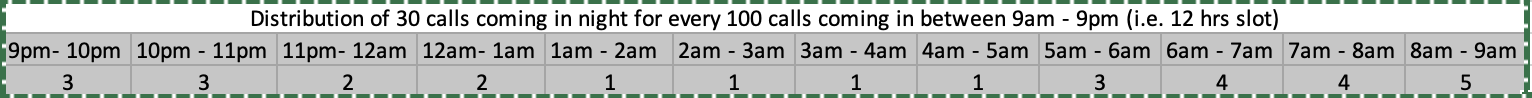

   #####    Now propose a manpower plan required during each time bucket in a day. Maximum Abandon rate assumption would be same 10%.


## Insights & Result:

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Adjust Jupyter view
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [4]:
# Importing data
raw_data = pd.read_csv("Call_Volume_Trend_Analysis_Project.csv")

In [5]:
raw_data.head(10)

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
0,Executives 42,1000042.0,98502XXXXX,2,01-01-2022,9,9_10,0.01.36,96,answered,Agent,YES,0.00.16
1,Executives 4,1000004.0,80595XXXXX,0,01-01-2022,9,9_10,0.02.20,140,answered,Agent,YES,0.00.26
2,Executives 65,1000065.0,70202XXXXX,0,01-01-2022,9,9_10,0.01.25,85,answered,AutoWrapped,YES,0.00.16
3,Executives 55,1000055.0,96104XXXXX,1,01-01-2022,9,9_10,0.01.31,91,answered,Agent,YES,0.00.25
4,Executives 21,1000021.0,82001XXXXX,0,01-01-2022,9,9_10,0.02.45,165,answered,Agent,YES,0.00.23
5,NaN,NaN,96424XXXXX,13,01-01-2022,9,9_10,0.00.00,0,abandon,NaN,YES,0.00.16
6,Executives 55,1000055.0,96737XXXXX,79,01-01-2022,9,9_10,0.01.25,85,answered,AutoWrapped,YES,0.00.13
7,NaN,NaN,96392XXXXX,60,01-01-2022,9,9_10,0.00.00,0,abandon,NaN,YES,0.00.17
8,Executives 42,1000042.0,90820XXXXX,52,01-01-2022,9,9_10,0.01.05,65,answered,Agent,YES,0.00.20
9,Executives 65,1000065.0,97410XXXXX,62,01-01-2022,9,9_10,0.03.00,180,answered,AutoWrapped,YES,0.00.44


In [6]:
raw_data.shape

(117988, 13)

In [7]:
row,column=raw_data.shape

In [8]:
row

117988

In [9]:
column

13

In [10]:
raw_data.columns

Index(['Agent_Name', 'Agent_ID', 'Customer_Phone_No', 'Queue_Time(Secs)', 'Date_&_Time', 'Time', 'Time_Bucket', 'Duration(hh:mm:ss)', 'Call_Seconds (s)', 'Call_Status', 'Wrapped _By', 'Ringing', 'IVR _Duration'], dtype='object')

In [11]:
data=raw_data.copy()

# `EDA`

# A. Calculate the average call time duration for all incoming calls received by agents (in each Time_Bucket)

In [12]:
data['Call_Status'].unique()

array(['answered', 'abandon', 'transfer'], dtype=object)

In [13]:
data[data['Call_Status']=='answered']['Call_Seconds (s)'].mean() # Average duration of the calls, which are answered.

198.6227744627177

In [14]:
data[data['Call_Status']=='transfer']['Call_Seconds (s)'].mean() # Average duration of the calls, which are transferred.

76.14651368049427

In [15]:
data[data['Call_Status']=='abandon']['Call_Seconds (s)'].mean() # Average duration of the calls, which are abandoned.

0.0

In [16]:
# Average duration of the calls, which are not abandoned.
data[(data['Call_Status']=='answered') | (data['Call_Status']=='transfer')]['Call_Seconds (s)'].mean() 

196.96260094514565

In [17]:
ans = data[data['Call_Status']!='abandon'] # Extracting the data for calls, which are not abandoned.

In [18]:
ans_tnf = data[data['Call_Status']!='abandon']  # Extracting the data for calls, which are not abandoned.

#The average call time duration for all incoming calls received by agents (in each Time_Bucket)
dd = ans_tnf.pivot_table(values='Call_Seconds (s)',index='Time_Bucket',aggfunc='mean')
dd = dd.sort_values(by='Time_Bucket',ascending=True).round(2)
dd = dd.iloc[np.arange(-1, len(dd)-1)]
dd 

,Call_Seconds (s)
Time_Bucket,
9_10,198.74
10_11,202.59
11_12,198.66
12_13,191.15
13_14,193.30
14_15,191.95
15_16,195.86
16_17,198.29
17_18,197.88


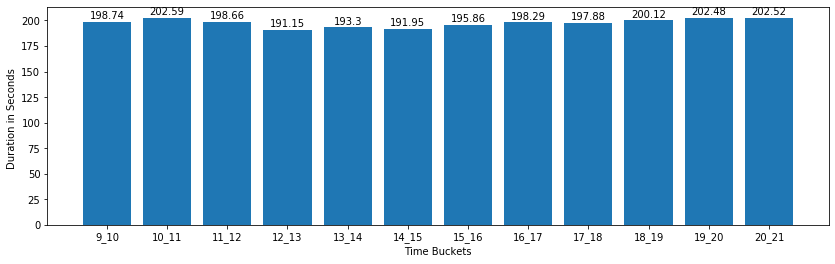

In [19]:
plt.figure(figsize=(14,4))
ax = plt.subplot(1,1,1)
x = dd.index
y =dd['Call_Seconds (s)']
plt.ylabel('Duration in Seconds ')
plt.xlabel('Time Buckets')
plt.bar(x,y)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            height,
            ha="center")

# B. Show the total volume/ number of calls coming in via charts/ graphs [Number of calls v/s Time]. You can select time in a bucket form (i.e. 1-2, 2-3, …..)

In [20]:
call_count_per = data.pivot_table(index='Time_Bucket', values='Call_Status',aggfunc='count')
call_count_per.rename(columns = {'Call_Status':'Call count'}, inplace = True)
call_count_per = call_count_per.sort_values(by = 'Time_Bucket')
call_count_per = call_count_per.iloc[np.arange(-1, len(call_count_per)-1)]
call_count_per['Call count %'] = round(100*call_count_per/call_count_per['Call count'].sum(),2)
call_count_per

,Call count,Call count %
Time_Bucket,,
9_10,9588,8.13
10_11,13313,11.28
11_12,14626,12.40
12_13,12652,10.72
13_14,11561,9.80
14_15,10561,8.95
15_16,9159,7.76
16_17,8788,7.45
17_18,8534,7.23


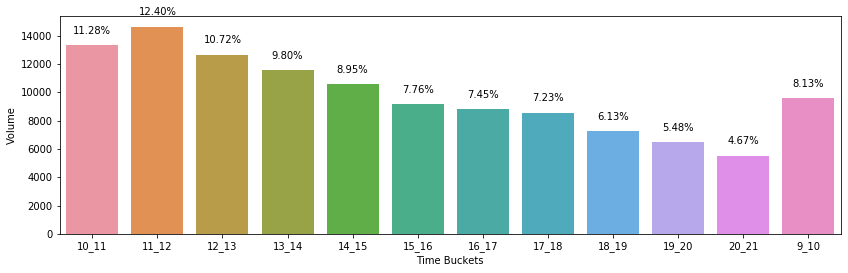

In [21]:
plt.figure(figsize=(14,4))
ax=sns.countplot(data['Time_Bucket'])
plt.ylabel('Volume')
plt.xlabel('Time Buckets')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%\n'.format(100 * height/len(data['Time_Bucket'])),
            ha="center")

# C. As you can see current abandon rate is approximately 30%. Propose a manpower plan required during each time bucket [between 9am to 9pm] to reduce the abandon rate to 10%. (i.e. You have to calculate minimum number of agents required in each time bucket so that at least 90 calls should be answered out of 100.) 

### Assumption:
An agent work for 6 days a week; On an average total unplanned leaves per agent is 4 days a month; An agent total working hrs is 9 Hrs out of which 1.5 Hrs goes into lunch and snacks in the office. On average an agent occupied for 60% of his total actual working Hrs (i.e 60% of 7.5 Hrs) on call with customers/ users. Total days in a month is 30 days.

From the above assumption we can say that:

- An agent work for 6 days a week, and on an average total unplanned leaves per agent is 4 days a month, means (30 - 4 - 4) = 22 days of work.
- An agent total working hrs is 9 Hrs out of which 1.5 Hrs goes into lunch and snacks in the office, On average an agent occupied for 60% of his total actual working Hrs [i.e 60% of (9 - 1.5) = 7.5 Hrs] on call with customers/ users, means 7.5 * 0.6 = 4.5 hours.


### Total number of employees 

In [22]:
print('Total number of agents:',data['Agent_ID'].nunique())

Total number of agents: 65


In [23]:
working = 65*22 # 65 number of agents * 30 days of work in a month
per_day_agent = (working)/30
print("Per day agent attendance: ",round(per_day_agent))

Per day agent attendance:  48


- There are total 65 employees working in the company.
- From the above assumptions, we get to know that an agent comes to office 22 days per month, that means (22/30)*100 ≈  73.5% attendance per day.
- Nearly 65 * 0.735 ≈ 48 agents come to office per day.

In [24]:
data['Call_Status'].unique()

array(['answered', 'abandon', 'transfer'], dtype=object)

In [25]:
ans_tnf = data[(data['Call_Status']=='answered') | (data['Call_Status']=='transfer')] # Not abandoned calls
abn = data[(data['Call_Status']=='abandon')] # Abandoned calls

print('Total number of calls: ',len(data)) # Total number of calls in the dataset
print('Total number of answered and transferred calls: ',len(ans_tnf)) # Number of not abandoned calls in the dataset
print('Total number of abandoned  calls: ',len(abn)) # Number of abandoned calls in the dataset

print('')

print('Average number of calls per day: ',round(len(data)/23)) # Total calls / number of days (23)
# Number of not abandoned calls in the dataset / 23
print('Average number of answered and transferred calls per day: ',round(len(ans_tnf)/23)) 
# Number of abandoned calls in the dataset / 23
print('Average number of abandoned calls per day: ',round(len(abn)/23))
#90% of per-day incoming calls
print('The target number of calls that need to attend from 9 AM to 9 PM per day: ',round(len(data)/23)*.9)

Total number of calls:  117988
Total number of answered and transferred calls:  83585
Total number of abandoned  calls:  34403

Average number of calls per day:  5130
Average number of answered and transferred calls per day:  3634
Average number of abandoned calls per day:  1496
The target number of calls that need to attend from 9 AM to 9 PM per day:  4617.0


#### <u>Explanation:

- 	Total number of calls:  117988
- 	Total number of answered and transferred calls:  83585
-	Total number of abandoned  calls:  34403
-	The average number of calls per day = Total number of calls / 23 = 117988/23 = 5130
-	The average number of answered and transferred calls per day = Total number of answered and transferred calls / 23 = 83585/23 = 3634
-	The average number of abandoned  calls per day = Total number of abandoned  calls/23 =  34403/23 = 1496
-	The target number of calls that need to attend from 9 AM to 9 PM per day = 90% of  the average   number of calls per day = 5130 * 0.90 = 4617


In [26]:
print('Target Abandon rate: ',round(100*(5130-4617)/5130,2),'%')

Target Abandon rate:  10.0 %


In [27]:
print('3634 calls are answered by 48 agents,\nThen, 4617 calls can be answered by(', round((48/3634)*4617),'+ 1 ) agents.')

3634 calls are answered by 48 agents,
Then, 4617 calls can be answered by( 61 + 1 ) agents.


##### Note:
“+ 1” is given, because the answer would give a fraction value, the number of agents can't be a    fraction, that’s why first I rounded the answer, then added 1.



In [28]:
call_count_per['Agent Required'] = round((call_count_per['Call count %']*61)/100)
call_count_per

,Call count,Call count %,Agent Required
Time_Bucket,,,
9_10,9588,8.13,5.0
10_11,13313,11.28,7.0
11_12,14626,12.40,8.0
12_13,12652,10.72,7.0
13_14,11561,9.80,6.0
14_15,10561,8.95,5.0
15_16,9159,7.76,5.0
16_17,8788,7.45,5.0
17_18,8534,7.23,4.0


In [29]:
call_count_per['Agent Required'].sum()

62.0

#### Extra:

In [30]:
(62/73.5)*100

84.35374149659864

In [31]:
round((62/73.5)*100)+1

85

In [32]:
85-65

20

## D. Let’s say customers also call this ABC insurance company in night but didn’t get answer as there are no agents to answer, this creates a bad customer experience for this Insurance company. Suppose every 100 calls that customer made during 9 Am to 9 Pm, customer also made 30 calls in night between interval [9 Pm to 9 Am] and distribution of those 30 calls are as follows:
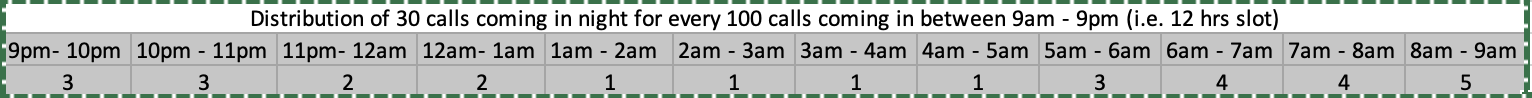
## Now propose a manpower plan required during each time bucket in a day. Maximum Abandon rate assumption would be same 10%

In [33]:
print('Total number of calls: ',len(data)) # Total number of calls in the dataset
ans_tnf = data[(data['Call_Status']=='answered') | (data['Call_Status']=='transfer')] # Not abandoned calls
print('Total number of answered and transferred calls: ',len(ans_tnf)) # Number of not abandoned calls in the dataset

print('')

print('Average number of calls per day: ',round(len(data)/23)) # Total calls / number of days (23)
print('Average number of answered and transferred calls per day: ',round(len(ans_tnf)/23)) # Not abandoned calls / 23
print('Average number of calls from 9 PM to 9 AM per day: ',round(.3*len(data)/23)) # 30% of per-day calls
#90% of night incoming calls
print('The target number of calls that need to attend from 9 PM to 9 AM per day: ',round(0.9*0.3*len(data)/23)) 

Total number of calls:  117988
Total number of answered and transferred calls:  83585

Average number of calls per day:  5130
Average number of answered and transferred calls per day:  3634
Average number of calls from 9 PM to 9 AM per day:  1539
The target number of calls that need to attend from 9 PM to 9 AM per day:  1385


#### <u>Explanation:

-	Total number of calls:  117988
-	Total number of answered and transferred calls:  83585
-	The average number of calls per day = Total number of calls / 23 = 117988/23 = 5130
-	The average number of answered and transferred calls per day = Total number of answered and transferred calls / 23 = 83585/23 = 3634
-	The average number of incoming calls per day from 9 PM to 9 AM = 30 % of per day incoming calls from 9 AM to 9 PM = 5130 * 0.30 = 1539
-	The target number of calls that need to attend from 9 PM to 9 AM per day = 90% of  the average   of incoming calls per day from 9 PM to 9 AM = 1539 * 0.90 = 1385


In [34]:
print('3634 calls are answered by 48 agents,\nThen, 1385 calls can be answered by (',round((48/3634)*1385),'+ 1 ) agents.')

3634 calls are answered by 48 agents,
Then, 1385 calls can be answered by ( 18 + 1 ) agents.


##### Note:
“+ 1” is given, because the answer would give a fraction value, the number of agents can't be a    fraction, that’s why first I rounded the answer, then added 1.



In [35]:
night = pd.DataFrame()
nn=['9pm - 10pm','10pm - 11pm','11pm - 12am', '12am - 1am','1am - 2am','2am - 3am','3am - 4am','4am - 5am','5am - 6am','6am - 7am','7am - 8am','8am - 9am']
night['Night Time Bucket'] = pd.DataFrame(nn)
night['Call count'] = pd.DataFrame([3,3,2,2,1,1,1,1,3,4,4,5])
night['Call count %'] = round(100*night['Call count']/night['Call count'].sum(),2)
night['Agent Required'] = round((night['Call count %']*18)/100)
night

,Night Time Bucket,Call count,Call count %,Agent Required
0,9pm - 10pm,3,10.00,2.0
1,10pm - 11pm,3,10.00,2.0
2,11pm - 12am,2,6.67,1.0
3,12am - 1am,2,6.67,1.0
4,1am - 2am,1,3.33,1.0
5,2am - 3am,1,3.33,1.0
6,3am - 4am,1,3.33,1.0
7,4am - 5am,1,3.33,1.0
8,5am - 6am,3,10.00,2.0
9,6am - 7am,4,13.33,2.0


In [36]:
night['Agent Required'].sum()

19.0

#### Extra:

In [37]:
(19/73.5)*100

25.850340136054424

In [38]:
round((19/73.5)*100)

26